# How to Remove Outliers for Machine Learning


In [2]:
#reference https://machinelearningmastery.com/

In [12]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
# seed the random number generator
seed(1)
# generate univariate observations center on 50
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


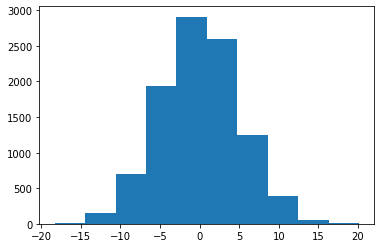

In [11]:
plt.hist(data);

In [10]:
data.shape

(10000,)

# Standard Deviation Method

If we know that the distribution of is  Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

For example, within one standard deviation of the mean will cover 68% of the data.

So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68% of the data sample. We can cover more of the data sample if we expand the range as follows:

1 Standard Deviation from the Mean: 68%
2 Standard Deviations from the Mean: 95%
3 Standard Deviations from the Mean: 99.7%

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

Given mu and sigma, a simple way to identify outliers is to compute a z-score for every xi, which is defined as the number of standard deviations away xi is from the mean […] Data values that have a z-score sigma greater than a threshold, for example, of three, are declared to be outliers.

In [8]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


So far we have only talked about univariate data with a Gaussian distribution, e.g. a single variable. You can use the same approach if you have multivariate data, e.g. data with multiple variables, each with a different Gaussian distribution.

You can imagine bounds in two dimensions that would define an ellipse if you have two variables. Observations that fall outside of the ellipse would be considered outliers. In three dimensions, this would be an ellipsoid, and so on into higher dimensions.

Alternately, if you knew more about the domain, perhaps an outlier may be identified by exceeding the limits on one or a subset of the data dimensions.

## Interquartile Range Method

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.
note once could try to use normaliation algorithms to make data normal, thats a topic for another time.

If the data is not normal distribution A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

Remember that percentiles can be calculated by sorting the observations and selecting values at specific indices. The 50th percentile is the middle value, or the average of the two middle values for an even number of examples. If we had 10,000 samples, then the 50th percentile would be the average of the 5000th and 5001st values.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

The IQR defines the middle 50% of the data, or the body of the data.

Statistics-based outlier detection techniques assume that the normal data points would appear in high probability regions of a stochastic(random probability) model, while outliers would occur in the low probability regions of a stochastic model.

— Page 12, Data Cleaning, 2019.

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. 

<font color='red'>
The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.
</font> 

On a box and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots.

We can calculate the percentiles of a dataset using the percentile() NumPy function that takes the dataset and specification of the desired percentile. The IQR can then be calculated as the difference between the 75th and 25th percentiles.

Percentiles: 25th=53.000, 75th=56.000, IQR=3.000
Identified outliers: 133
Non-outlier observations: 9867


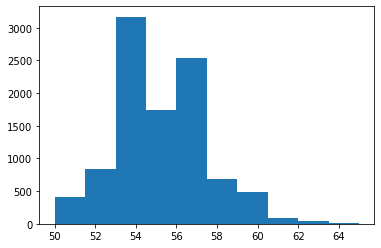

In [34]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
import numpy as np
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(10000) + 50
data = np.random.poisson(5, 100000) + 50

# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
plt.hist(data);

<p> The approach can be used for multivariate data by calculating the limits on each variable in the dataset in turn, and taking outliers as observations that fall outside of the rectangle or hyper-rectangle.</p>

<h2>Automatic Outlier Detection</h2>
<p>In machine learning, an approach to tackling the problem of outlier detection is <a href="https://en.wikipedia.org/wiki/One-class_classification">one-class classification</a>.</p>
<p>One-Class Classification, or OCC for short, involves fitting a model on the “<em>normal</em>” data and predicting whether new data is normal or an outlier/anomaly.</p>
<blockquote><p>A one-class classifier aims at capturing characteristics of training instances, in order to be able to distinguish between them and potential outliers to appear.</p></blockquote>
<p>— Page 139, <a href="https://amzn.to/307Xlva">Learning from Imbalanced Data Sets</a>, 2018.</p>
<p>A one-class classifier is fit on a training dataset that only has examples from the normal class. Once prepared, the model is used to classify new examples as either normal or not-normal, i.e. outliers or anomalies.</p>
<p>A simple approach to identifying outliers is to locate those examples that are far from the other examples in the feature space.</p>
<p>This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.</p>
<p>The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.</p>
<blockquote><p>We introduce a local outlier (LOF) for each object in the dataset, indicating its degree of outlier-ness.</p></blockquote>
<p>— <a href="https://dl.acm.org/citation.cfm?id=335388">LOF: Identifying Density-based Local Outliers</a>, 2000.</p>
<p>The scikit-learn library provides an implementation of this approach in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html">LocalOutlierFactor class</a>.</p>
<p>We can demonstrate the LocalOutlierFactor method on a predictive modelling dataset.</p>
<p>We will use the Boston housing regression problem that has 13 inputs and one numerical target and requires learning the relationship between suburb characteristics and house prices.</p>
<p>The dataset can be downloaded from here:</p>
<ul>
<li><a href="https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv">Boston Housing Dataset (housing.csv)</a></li>
<li><a href="https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names">Boston Housing Dataset Details (housing.names)</a></li>

In [19]:
# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)

# retrieve the array
data = df.values

#check data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [21]:
# split into inpiut and output elements
# x = all rows , all columns not incuding last, 
# y = all rows, only last colum 
X, y = data[:, :-1], data[:, -1]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


<p>Next, we can try removing outliers from the training dataset.</p>
<p>The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem, and that removing these outliers from the training set will allow a more effective model to be learned.</p>
<p>We can achieve this by defining the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html">LocalOutlierFactor</a> model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1). We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specifics of your dataset.</p><!-- Urvanov Syntax Highlighter v2.8.12 -->


In [23]:
# identify outliers in the training dataset
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor() # there are parameters we can play with here , default is used for this example 
yhat = lof.fit_predict(X_train)

In [25]:
yhat.shape

(339,)

In [26]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [29]:
# mask generated by LOF is used to filter data 
mask

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [27]:
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(305, 13) (305,)
MAE: 3.356
